# Implementação de rede neural com back-propagation para problema simples de regressão

Baseado no tutorial ["How to Code a Neural Network with Backpropagation In Python (from scratch)"](https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/).


In [1]:
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

def print_net(net):
    for i, layer in enumerate(net):
        print("Camada {}".format(i+1) if i==0 else "Camada de saída")
        for j, neuron in enumerate(layer):
            output = ", Saída: {}".format(neuron["output"]) if "output" in neuron else ""
            delta = ", Delta (erro): {}".format(neuron["delta"]) if "delta" in neuron else ""
            print("Neurônio {}, Pesos + Bias: ".format(j), neuron["weights"], output, delta)

net = initialize_network(1, 5, 1)
print_net(net)

Camada 1
Neurônio 0, Pesos + Bias:  [0.1147318584152337, 0.9474011362074053]  
Neurônio 1, Pesos + Bias:  [0.46273526192493675, 0.41918217750832665]  
Neurônio 2, Pesos + Bias:  [0.47110074843255634, 0.8643772351112919]  
Neurônio 3, Pesos + Bias:  [0.5328911283792013, 0.5044505509979488]  
Neurônio 4, Pesos + Bias:  [0.24594428783807165, 0.42825530974773063]  
Camada de saída
Neurônio 0, Pesos + Bias:  [0.6210927890420977, 0.8035694606550159, 0.34185970153607514, 0.04659649323271764, 0.05367417112359363, 0.21943839346481275]  


In [2]:
import numpy as np

def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

weights = np.array([2, 4]) # O último é o bias
input = np.array([2])
print("Somatório neurônio: ", activate(weights, input))

Somatório neurônio:  8


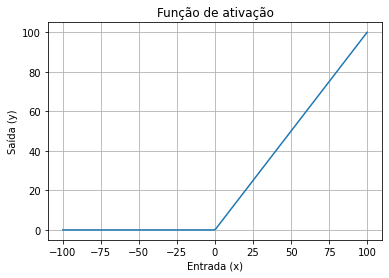

In [10]:
import matplotlib.pyplot as plt
#mudar pra Relu
def transfer(activation):
	#return 1.0 / (1.0 + np.exp(-activation))
	return np.maximum(np.zeros(activation.shape[0]), activation)

plt.figure()
x_transfer = np.linspace(-100,100,200)
y_transfer = transfer(x_transfer)
plt.title("Função de ativação")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.grid()
plt.plot(x_transfer,y_transfer)
plt.show()

In [11]:
#Remover função de ativação da ultima camada se formmos fazer regressão
def forward_propagate(network, row):
	inputs = row
	for i, layer in enumerate(network):
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation) if (i+1) != len(network) else activation
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
	
output = forward_propagate(net, input)
print ("Saída da rede neural:", output)

IndexError: tuple index out of range

In [ ]:
def transfer_derivative(output):
	# return output * (1.0 - output)
	return 1 if output>=0 else 0

plt.figure()
x_transfer_derivative = np.linspace(-100,100,200)
y_transfer_derivative = transfer_derivative(x_transfer_derivative)
plt.title("Derivada da função de ativação")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.grid()
plt.plot(x_transfer_derivative,y_transfer_derivative)
plt.show()

In [ ]:
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output']) if (i+1) != len(network) else errors[j] * neuron["output"]

print(input)
expected = [5]
backward_propagate_error(net, expected)
print_net(net)

In [ ]:
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[-1:]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

learning_rate = 0.001
update_weights(net, input, learning_rate)
print_net(net)

In [ ]:
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs

print("Entrada: ", input, ", Saída: ",predict(net, input))

## Preparação da base de dados

In [ ]:
# Função que vamos tentar aproximar
n = 10 # Número de registros na base de dados
x = np.linspace(-1,1,n)
y = 5+x*3

plt.figure()
plt.title("Função usada para treinamento")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.ylim([0,10])
plt.grid()
plt.plot(x,y)
plt.show()

In [ ]:
# Divisão base de dados para treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=test_size)
print("Dimensão entradas para treino = {}\nDimensão saídas para treino = {}\n\nDimensão entradas para teste = {}\nDimensão saídas para teste = {}\n".format(x_train.shape[0], y_train.shape[0], x_test.shape[0], y_test.shape[0]))

In [ ]:
# Implementando validação cruzada
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=1)
for train, test in rkf.split(x_train):
	print("Índices treino: %s, Índices validação: %s" % (train, test))

## Treinamento da rede

In [ ]:
def train_network(network, n_splits, x_train, y_train, l_rate, n_repeats):
	rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
	avg_errors = np.array([])
	for train_idx, valid_idx in rkf.split(x_train):
		for idx in train_idx: # Treino
			outputs = forward_propagate(network, x_train[idx])
			expected = [y_train[idx]]
			backward_propagate_error(network, expected)
			update_weights(network, x_train[idx], l_rate)
		errors = np.array([])
		for idx in valid_idx: #Validação
			outputs = predict(network, x_train[idx])
			expected = y_train[idx]
			errors = np.append(errors, (expected-outputs)**2) # Erro quadrático
		avg_errors = np.append(avg_errors, np.mean(errors))
	
	return avg_errors

net = initialize_network(1, 5, 1)
print_net("Rede neural antes do treinamento:\n", print_net(net), "\n\n")
avg_errors = train_network(net, 5, x_train, y_train, learning_rate, 100)
print_net("Rede neural depois do treinamento:\n", print_net(net), "\n\n")
plt.figure()
plt.title("Erro quadrático médio")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.grid()
plt.plot(np.arange(1, len(avg_errors)+1), avg_errors)
plt.show()

In [ ]:
def test_network(network, x_test, y_test):
	errors = np.array([])
	for i, x in enumerate(x_test): #Validação
		outputs = predict(network, x)
		expected = y_test[i]
		errors = np.append(errors, (expected-outputs)**2) # Erro quadrático
	print("Erro médio: ", np.mean(errors))

test_network(net, x_test, y_test)

In [ ]:
outputs = np.array([])
for value in x:
	outputs = np.append(outputs, predict(net, [value]))

plt.figure()
plt.title("Comparação função original x rede neural")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.grid()
plt.plot(x, y, label="Original", color="blue")
plt.plot(x, outputs, label="Rede neural", color="red")
plt.legend()
plt.show()